In [159]:

import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_colwidth', None)


# Función EDA para evaluar columnas del dataframe

In [160]:
def analisis_eda (df):

    nombre_columnas = df.columns

    lista_diccionarios = []

    for col in nombre_columnas:

        # print("+++++++++++++++++++")
        # print(f"Entro en {col}")

        dicc = {}

        dicc["nombre_columna"] = col
        
        dicc["isnull"] = df[col].isnull().sum()

        dicc["notnull"] = df[col].notnull().sum()

        dicc["duplicated"] = df[col].duplicated().sum() 

        dicc["unique"] = df[col].unique()

        dicc["value_counts"] = df.value_counts(col)

        # print("++++++++++++++++++++++++++++++++++++++")
        # print(f"Imprimimos el diccionario \n\n{dicc}")

        lista_diccionarios.append(dicc)
    
    # Creamos el dataframe 
     
    df_analisis = pd.DataFrame(lista_diccionarios)

    # Y volcamos el resultado en un fichero excel para visualizarlo fácilmente

    df_analisis.to_excel("analisis_eda.xlsx")

    return df_analisis

## ANA IMPUTACION COMPLEJA COLUMNA 'TOTALWORKINGYEARS'

### Tras unir los 3 dataframes limpios, seguimos con la gestión más compleja de nulos.

In [161]:
df_limpio = pd.read_csv('df_limpio.csv', index_col = 0)

# Eliminamos columnas 

df_limpio.drop(["yearsincurrentrole", "unnamed: 0"], axis = 1, inplace = True) 

In [162]:
df_limpio.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'yearincome', 'monthlyincome', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'datebirth',
       'roledepartament', 'remotework'],
      dtype='object')

# Gestión de nulos complejos

Vamos a probar tres maneras diferentes de imputar valores para la columna 'totalworkingyears': 
imputación simple por la mediana e imputación compleja con los métodos Iterative Imputer y KNN.

In [163]:
df_limpio1 = df_limpio.copy()

In [164]:
df_limpio1.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
0,51.0,No,NaN,684.0,NaN,6,3,NaN,162.0,1,M,51.0,3,5,research director,3,unknown,6462,7,no,13,3.0,3,NaN,234444.0,19537.0,0,NaN,5,3.0,20,15,15,1972,Unknown,Si
1,52.0,No,NaN,699.0,NaN,1,4,Life Sciences,259.0,3,M,65.0,2,5,manager,3,unknown,5678,0,unknown,14,3.0,1,NaN,239988.0,19999.0,1,34.0,5,3.0,33,11,9,1971,Unknown,Si
2,42.0,No,rarely,532.0,Research & Development,4,2,Technical Degree,319.0,3,M,58.0,3,5,manager,4,married,4933,1,no,11,3.0,4,NaN,230784.0,19232.0,0,22.0,3,NaN,22,11,15,1981,manager - research & development,Si
3,47.0,No,rarely,359.0,NaN,2,4,Medical,unknown,1,F,82.0,3,4,research director,3,married,26703,3,unknown,19,3.0,2,NaN,206028.0,17169.0,2,NaN,2,NaN,20,5,6,1976,Unknown,No
4,46.0,No,NaN,1319.0,NaN,3,3,Technical Degree,unknown,1,F,45.0,4,4,sales executive,1,divorced,7739,2,no,12,3.0,4,NaN,NaN,NaN,1,NaN,5,3.0,19,2,8,1977,Unknown,No


In [165]:
# Calculamos la media y la mediana. 

media = df_limpio1["totalworkingyears"].mean()

mediana = df_limpio1["totalworkingyears"].median()

print(f"La media es {media}. La mediana es {mediana}")


La media es 11.318933823529411. La mediana es 10.0


A ojo no sabemos cuánto de distintas son la media y la mediana. 

Para decidir si nos quedamos con una u otra para la imputación simple vamos a estudiar los outliers gráficamente.

''

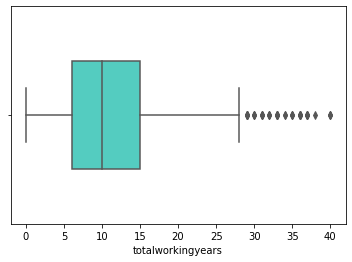

In [166]:
# totalworkingyears

# añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(x = "totalworkingyears", 
            data = df_limpio1, 
            width = 0.5, 
            color = "turquoise")
;

- Descartamos la MEDIA debido a la gran cantidad de outliers.
Probamos MEDIANA:

In [167]:
imputacion_mediana = df_limpio1["totalworkingyears"].fillna(mediana)
imputacion_mediana

0       10.0
1       34.0
2       22.0
3       10.0
4       10.0
        ... 
1609    10.0
1610    10.0
1611     9.0
1612    12.0
1613    10.0
Name: totalworkingyears, Length: 1614, dtype: float64

In [168]:
# Hacemos copias de seguridad.

df_limpio_casi_completo = df_limpio1.copy()
df_copia = df_limpio_casi_completo.copy()

In [169]:
# MÉTODOS COMPLEJOS: IterativeImputer

# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos. OJO con el doble corchete de la columna.
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["totalworkingyears"]])

# comprobamos que lo que nos devuelve es un array 
imputer_iterative_imputado


array([[11.31893382],
       [34.        ],
       [22.        ],
       ...,
       [ 9.        ],
       [12.        ],
       [11.31893382]])

In [170]:
# MÉTODOS COMPLEJOS: KNN

# NOTA, la ejecución de esta celda puede tardar un ratito

# instanciamos la clase del KNNImputer

imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos

imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["totalworkingyears"]])

# comprobamos que es lo que nos devuelve es un array

imputer_knn_imputado

array([[11.31893382],
       [34.        ],
       [22.        ],
       ...,
       [ 9.        ],
       [12.        ],
       [11.31893382]])

In [171]:
# Ahora añadimos a nuestro dataframe copia ((df_copia) las tres columnas con valores imputados para totalworkingyears.

df_copia['imputando_con_mediana'] = imputacion_mediana
df_copia['imputando_II'] = imputer_iterative_imputado
df_copia['imputando_con_KNN'] = imputer_knn_imputado

df_copia.sample()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework,imputando_con_mediana,imputando_II,imputando_con_KNN
435,53.0,Yes,NaN,607.0,NaN,2,5,NaN,1572.0,3,F,78.0,2,3,manufacturing director,4,married,14618,0,unknown,16,3.0,2,NaN,NaN,NaN,1,NaN,4,3.0,33,1,9,1970,Unknown,Si,10.0,11.318934,11.318934


In [172]:
# Para comparar los diferentes resultados, usamos el método describe. 
# Vemos las columnas con valores imputadas y las comparamos con la columna original 'totalworkingyears'
# Nos quedamos con el resultado que menos se aleje de los estadísticos originales.

df_copia.describe()[['totalworkingyears', 'imputando_con_mediana', 'imputando_II', 'imputando_con_KNN']]



,totalworkingyears,imputando_con_mediana,imputando_II,imputando_con_KNN
count,1088.000000,1614.000000,1614.000000,1614.000000
mean,11.318934,10.889095,11.318934,11.318934
std,7.727675,6.373824,6.343755,6.343755
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,8.000000,8.000000
50%,10.000000,10.000000,11.318934,11.318934
75%,15.000000,11.000000,11.318934,11.318934
max,40.000000,40.000000,40.000000,40.000000


In [173]:
# RESULTADO: II y KNN dan resultados exactamente iguales entre sí. Nos sirve cualquiera de ellos.

# Sustituimos en nuestro dataframe la columna 'totalworkingyears' por los resultados de II. 


df_limpio1['totalworkingyears'] = df_copia['imputando_II']


In [174]:
# Comprobamos que ya no quedan nulos.

df_limpio1['totalworkingyears'].isnull().sum()

0

In [175]:
df_limpio1.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
0,51.0,No,NaN,684.0,NaN,6,3,NaN,162.0,1,M,51.0,3,5,research director,3,unknown,6462,7,no,13,3.0,3,NaN,234444.0,19537.0,0,11.318934,5,3.0,20,15,15,1972,Unknown,Si
1,52.0,No,NaN,699.0,NaN,1,4,Life Sciences,259.0,3,M,65.0,2,5,manager,3,unknown,5678,0,unknown,14,3.0,1,NaN,239988.0,19999.0,1,34.000000,5,3.0,33,11,9,1971,Unknown,Si
2,42.0,No,rarely,532.0,Research & Development,4,2,Technical Degree,319.0,3,M,58.0,3,5,manager,4,married,4933,1,no,11,3.0,4,NaN,230784.0,19232.0,0,22.000000,3,NaN,22,11,15,1981,manager - research & development,Si
3,47.0,No,rarely,359.0,NaN,2,4,Medical,unknown,1,F,82.0,3,4,research director,3,married,26703,3,unknown,19,3.0,2,NaN,206028.0,17169.0,2,11.318934,2,NaN,20,5,6,1976,Unknown,No
4,46.0,No,NaN,1319.0,NaN,3,3,Technical Degree,unknown,1,F,45.0,4,4,sales executive,1,divorced,7739,2,no,12,3.0,4,NaN,NaN,NaN,1,11.318934,5,3.0,19,2,8,1977,Unknown,No


## IMPUTACION COMPLEJA COLUMNA 'YEARINCOME' MARIA

Al igual que en la clumna anterior, vamos a probar tres maneras diferentes de imputar valores para la columna 'totalworkingyears': 
imputación simple por la mediana e imputación compleja con los métodos Iterative Imputer y KNN.

In [176]:
# Calculamos la media y la mediana. 

media = df_limpio1["yearincome"].mean()

mediana = df_limpio1["yearincome"].median()

print(f"La media es {media}. La mediana es {mediana}")

La media es 77732.23346303502. La mediana es 58308.0


Para decidir si nos quedamos con la media o la mediana, vamos a estudiar los outliers gráficamente.

''

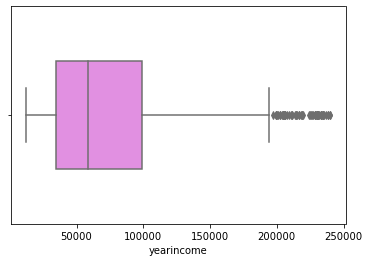

In [177]:
# yearincome

# añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(x = "yearincome", 
            data = df_limpio1, 
            width = 0.5, 
            color = "violet")
;

- Encontramos una cantidad de outliers elevada, por lo que descartamos la MEDIA y probamos la MEDIANA:

In [178]:
imputacion_mediana = df_limpio1["yearincome"].fillna(mediana)
imputacion_mediana

0       234444.0
1       239988.0
2       230784.0
3       206028.0
4        58308.0
          ...   
1609    123900.0
1610     53364.0
1611     58308.0
1612     58308.0
1613    130140.0
Name: yearincome, Length: 1614, dtype: float64

In [179]:
# Hacemos copias de seguridad.

df_limpio_casi_completo = df_limpio1.copy()
df_copia = df_limpio_casi_completo.copy()

In [180]:
# MÉTODOS COMPLEJOS: IterativeImputer

# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos. OJO con el doble corchete de la columna.
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["yearincome"]])

# comprobamos que lo que nos devuelve es un array 
imputer_iterative_imputado

array([[234444.        ],
       [239988.        ],
       [230784.        ],
       ...,
       [ 77732.23346304],
       [ 77732.23346304],
       [130140.        ]])

In [181]:
# MÉTODOS COMPLEJOS: KNN

# NOTA, la ejecución de esta celda puede tardar un ratito

# instanciamos la clase del KNNImputer

imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos

imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["yearincome"]])

# comprobamos que es lo que nos devuelve es un array

imputer_knn_imputado

array([[234444.        ],
       [239988.        ],
       [230784.        ],
       ...,
       [ 77732.23346304],
       [ 77732.23346304],
       [130140.        ]])

In [182]:
# Ahora añadimos a nuestro dataframe copia ((df_copia) las tres columnas con valores imputados para yearincome.

df_copia['imputando_con_mediana'] = imputacion_mediana
df_copia['imputando_II'] = imputer_iterative_imputado
df_copia['imputando_con_KNN'] = imputer_knn_imputado

df_copia.sample()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework,imputando_con_mediana,imputando_II,imputando_con_KNN
623,40.0,Yes,NaN,299.0,NaN,25,4,NaN,unknown,4,M,57.0,2,3,sales executive,2,single,17235,2,yes,12,3.0,3,"80,0",NaN,NaN,0,9.0,2,3.0,5,1,0,1983,Unknown,Si,58308.0,77732.233463,77732.233463


In [183]:
# Para comparar los diferentes resultados, usamos el método describe. 
# Vemos las columnas con valores imputadas y las comparamos con la columna original 'yearincome'
# Nos quedamos con el resultado que menos se aleje de los estadísticos originales.

df_copia.describe()[['yearincome', 'imputando_con_mediana', 'imputando_II', 'imputando_con_KNN']]

,yearincome,imputando_con_mediana,imputando_II,imputando_con_KNN
count,771.000000,1614.000000,1614.000000,1614.000000
mean,77732.233463,67586.862454,77732.233463,77732.233463
std,57193.439507,40690.543256,39516.128943,39516.128943
min,12108.000000,12108.000000,12108.000000,12108.000000
25%,34560.000000,58308.000000,60696.000000,60696.000000
50%,58308.000000,58308.000000,77732.233463,77732.233463
75%,98766.000000,58308.000000,77732.233463,77732.233463
max,239988.000000,239988.000000,239988.000000,239988.000000


In [184]:
# Aunque las 3 columnas dan resultados muy parecidos, RESULTADO: II y KNN son exactamente iguales entre sí. Nos sirve cualquiera de ellos.

# Sustituimos en nuestro dataframe la columna 'yearincome' por los resultados de II. 


df_limpio1['yearincome'] = df_copia['imputando_II']

In [185]:
# Comprobamos que ya no quedan nulos.

df_limpio1['yearincome'].isnull().sum()

0

In [186]:
df_limpio1.sample(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
828,25.0,No,NaN,NaN,Sales,28,3,Life Sciences,unknown,1,M,41.0,2,2,sales executive,3,unknown,24835,2,unknown,18,3.0,4,NaN,77732.233463,NaN,0,11.318934,3,3.0,2,2,2,1998,sales executive - sales,No
725,31.0,No,frequently,853.0,NaN,1,1,NaN,1011.0,3,F,NaN,3,2,manufacturing director,1,unknown,11275,1,no,12,3.0,3,NaN,77732.233463,NaN,1,4.000000,1,3.0,4,0,3,1992,Unknown,No
1568,45.0,No,rarely,561.0,NaN,2,3,Other,unknown,4,M,61.0,3,2,sales executive,2,unknown,16177,0,no,19,3.0,2,NaN,57660.000000,4805.0,1,11.318934,3,4.0,8,3,7,1978,Unknown,No


## ANA IMPUTACION DE MEDIA

In [187]:
# Trabajo sobre una copia por si acaso

df_copia = df_limpio1.copy()

df_copia.shape

(1614, 36)

Primeramente, corregimos el error del cliente en la columna 'standardhours' sustituyendo todos los valores de '80' a '40' 

In [188]:

# Pasamos primero a '40' (object) para que no haya numeros con objects.

df_copia['standardhours'] = df_copia['standardhours'].replace('80,0', '40')
df_copia['standardhours'].unique()


array([nan, '40'], dtype=object)

In [189]:
# Y ahora pasamos toda la columna a float (porque todavía tiene nan).

df_copia['standardhours'] = df_copia['standardhours'].astype(float)
df_copia['standardhours'].unique()


array([nan, 40.])

Ahora que las tres columnas son numéricas, sí podemos imputar los nulos con la media de cada columna.

In [190]:
lista_columnas_imputacion_media = ['performancerating', 'standardhours', 'worklifebalance']

for col in lista_columnas_imputacion_media:
    print(df_copia[col].dtype)

float64
float64
float64


In [191]:
lista_columnas_imputacion_media = ['performancerating', 'standardhours', 'worklifebalance']

for col in lista_columnas_imputacion_media:
    media = round(df_copia[col].mean(), 2)
    print(media)
    print(f"La media de {col} es {media}")               # Calculamos la media de cada columna
    df_copia[col] = df_copia[col].fillna(media)                # Imputamos los nulos con ese valor y sustituimos en el dataframe


3.15
La media de performancerating es 3.15
40.0
La media de standardhours es 40.0
2.76
La media de worklifebalance es 2.76


In [192]:
# Comprobamos que ya no quedan nulos

for columna in lista_columnas_imputacion_media:
    print(f"En la columna {columna} hay {df_copia[columna].isnull().sum()} nulos")                  # Comprobamos que ya no hay nulos.


En la columna performancerating hay 0 nulos
En la columna standardhours hay 0 nulos
En la columna worklifebalance hay 0 nulos


In [193]:
df_copia.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
0,51.0,No,NaN,684.0,NaN,6,3,NaN,162.0,1,M,51.0,3,5,research director,3,unknown,6462,7,no,13,3.0,3,40.0,234444.000000,19537.0,0,11.318934,5,3.00,20,15,15,1972,Unknown,Si
1,52.0,No,NaN,699.0,NaN,1,4,Life Sciences,259.0,3,M,65.0,2,5,manager,3,unknown,5678,0,unknown,14,3.0,1,40.0,239988.000000,19999.0,1,34.000000,5,3.00,33,11,9,1971,Unknown,Si
2,42.0,No,rarely,532.0,Research & Development,4,2,Technical Degree,319.0,3,M,58.0,3,5,manager,4,married,4933,1,no,11,3.0,4,40.0,230784.000000,19232.0,0,22.000000,3,2.76,22,11,15,1981,manager - research & development,Si
3,47.0,No,rarely,359.0,NaN,2,4,Medical,unknown,1,F,82.0,3,4,research director,3,married,26703,3,unknown,19,3.0,2,40.0,206028.000000,17169.0,2,11.318934,2,2.76,20,5,6,1976,Unknown,No
4,46.0,No,NaN,1319.0,NaN,3,3,Technical Degree,unknown,1,F,45.0,4,4,sales executive,1,divorced,7739,2,no,12,3.0,4,40.0,77732.233463,NaN,1,11.318934,5,3.00,19,2,8,1977,Unknown,No


## IMPUTACIONES MODA MARIA

In [194]:
# Hago una copia para trabajar sobre ella
df_imput_moda = df_copia.copy()

In [195]:
# BUSINESSTRAVEL

# calculo la moda de la columna "businesstravel"
imput_moda = df_imput_moda["businesstravel"].mode()[0]

# reemplazo los valores nulos por la moda con fillna
df_imput_moda["businesstravel"] = df_imput_moda["businesstravel"].fillna(imput_moda)

# compruebo que se han eliminado los nulos
df_imput_moda["businesstravel"].isnull().sum()

0

In [196]:
df_imput_moda.sample(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
185,41.0,No,rarely,465.0,Research & Development,34,3,Life Sciences,227.0,1,M,56.0,3,1,research scientist,3,divorced,4609,4,no,12,3.0,1,40.0,77732.233463,NaN,1,11.318934,2,3.0,9,1,8,1982,research scientist - research & development,Si
428,45.0,No,rarely,1038.0,NaN,20,3,Medical,1460.0,2,M,95.0,1,3,healthcare representative,1,unknown,19863,2,yes,18,3.0,2,40.0,130212.000000,10851.0,1,11.318934,2,3.0,7,0,7,1978,Unknown,No
127,35.0,No,rarely,619.0,NaN,1,3,NaN,600.0,2,M,85.0,3,2,sales executive,3,unknown,18659,9,unknown,11,3.0,3,40.0,77732.233463,NaN,0,15.000000,2,3.0,11,6,9,1988,Unknown,Si


In [197]:
df_imput_moda['department'].unique()

array([nan, ' Research & Development ', ' Sales ', ' Human Resources '],
      dtype=object)

## IMPUTACION COLUMNAS UNKNOWN JACKIE

In [198]:
# Hago una copia para trabajar sobre ella
df_limpio_completo2 = df_imput_moda.copy()

In [199]:
#Imputacion columna categorica roledepartament por Unknown
columnas_desconocidas = ['department', 'educationfield']

# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "Uknown"
for columna in columnas_desconocidas:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df_limpio_completo2[columna] = df_limpio_completo2[columna].fillna("unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_limpio_completo2[columnas_desconocidas].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


department        0
educationfield    0
dtype: int64

In [200]:
df_limpio_completo2.sample(10)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
175,27.0,No,frequently,994.0,unknown,8,3,unknown,unknown,4,M,37.0,3,3,sales executive,3,single,2975,1,no,15,3.00,4,40.0,77732.233463,NaN,0,9.000000,0,3.00,9,1,7,1996,Unknown,No
757,28.0,No,rarely,580.0,unknown,27,3,unknown,1622.0,2,F,39.0,1,2,manufacturing director,1,divorced,20460,0,unknown,21,4.00,2,40.0,58524.000000,4877.0,1,6.000000,5,2.00,5,0,0,1995,Unknown,Si
547,34.0,No,rarely,1400.0,unknown,9,1,Life Sciences,unknown,2,F,70.0,3,2,sales executive,3,married,5829,1,unknown,20,4.00,1,40.0,77732.233463,NaN,0,11.318934,3,2.00,6,1,3,1989,Unknown,No
302,55.0,No,rarely,147.0,Research & Development,20,2,Technical Degree,389.0,2,M,37.0,3,2,laboratory technician,4,married,15972,3,unknown,19,3.15,4,40.0,77732.233463,NaN,1,12.000000,4,3.00,10,0,8,1968,laboratory technician - research & development,Si
19,40.0,No,rarely,884.0,unknown,15,3,Life Sciences,unknown,1,F,80.0,2,3,manufacturing director,3,unknown,25800,1,unknown,13,3.00,4,40.0,77732.233463,NaN,2,18.000000,2,2.76,18,14,12,1983,Unknown,Si
250,29.0,No,frequently,574.0,Research & Development,46,1,Medical,unknown,4,M,40.0,3,1,laboratory technician,4,married,7003,1,no,13,3.15,2,40.0,77732.233463,NaN,0,11.318934,3,4.00,11,3,10,1994,laboratory technician - research & development,No
43,36.0,Yes,rarely,885.0,unknown,16,4,unknown,1042.0,3,F,43.0,4,1,laboratory technician,1,single,8269,1,unknown,16,3.00,3,40.0,77732.233463,NaN,0,18.000000,1,3.00,17,15,14,1987,Unknown,Si
958,44.0,No,rarely,986.0,unknown,8,4,Life Sciences,874.0,1,M,62.0,4,1,laboratory technician,4,unknown,5044,2,yes,24,4.00,3,40.0,77732.233463,NaN,1,10.000000,2,2.00,3,0,2,1979,Unknown,No
1380,48.0,No,rarely,969.0,unknown,2,2,Technical Degree,1258.0,4,M,76.0,4,1,laboratory technician,2,single,16620,5,unknown,11,3.00,3,40.0,77732.233463,NaN,0,7.000000,4,2.00,1,0,0,1975,Unknown,Si
1035,27.0,No,frequently,793.0,unknown,2,1,Life Sciences,1371.0,4,M,43.0,1,2,sales executive,4,single,20392,3,no,20,4.00,2,40.0,60852.000000,5071.0,0,11.318934,3,3.00,6,0,0,1996,Unknown,No


In [201]:
df_limpio_completo2['roledepartament'].unique()

array(['Unknown', ' manager  -  research & development ',
       ' healthcare representative  -  research & development ',
       ' sales executive  -  sales ',
       ' laboratory technician  -  research & development ',
       ' manufacturing director  -  research & development ',
       ' research scientist  -  research & development ',
       ' research director  -  research & development ',
       ' human resources  -  human resources ', ' manager  -  sales ',
       ' sales representative  -  sales ',
       ' manager  -  human resources '], dtype=object)

In [202]:
 
# sobreescribimos los valores de las columnas 
df_limpio_completo2["roledepartament"] = df_limpio_completo2["roledepartament"].str.lower()

#Comprobamos que no tenga nulos

df_limpio_completo2['roledepartament'].isnull().sum()



0

In [203]:
#Corregir 'yes' y 'no'

#diccionario_mapa = {'No': "No", 'Yes' : 'Si', 'no' : 'No', 'yes', 'Si' }

#df_limpio_completo2[["attrition", "overtime"] = df_limpio_completo2[["attrition", "overtime"]].map(diccionario_mapa)


In [204]:
df_limpio_completo2.sample(10)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
1098,36.0,No,non-travel,894.0,Research & Development,1,4,unknown,1662.0,4,F,33.0,2,2,manufacturing director,3,unknown,15411,0,unknown,15,3.0,3,40.0,52488.000000,4374.0,0,4.000000,6,3.0,3,1,2,1987,manufacturing director - research & development,Si
950,28.0,Yes,rarely,890.0,unknown,2,4,unknown,unknown,3,M,NaN,3,1,research scientist,3,single,16374,6,no,17,3.0,4,40.0,52584.000000,4382.0,0,5.000000,3,2.0,2,2,1,1995,unknown,Si
833,28.0,No,rarely,440.0,Research & Development,21,3,Medical,221.0,3,M,42.0,3,1,research scientist,4,married,6672,1,no,11,3.0,3,40.0,77732.233463,NaN,1,5.000000,2,1.0,5,0,2,1995,research scientist - research & development,Si
353,40.0,No,rarely,791.0,unknown,13,2,Medical,unknown,1,F,38.0,4,2,healthcare representative,2,unknown,9931,1,no,24,4.0,4,40.0,50928.000000,4244.0,1,8.000000,2,3.0,8,3,7,1983,unknown,Si
407,44.0,Yes,rarely,621.0,unknown,15,3,Medical,1295.0,1,F,73.0,3,3,healthcare representative,4,married,14075,1,unknown,11,3.0,4,40.0,77732.233463,NaN,1,11.318934,2,3.0,10,0,5,1979,unknown,Si
570,50.0,No,rarely,1452.0,unknown,11,3,unknown,226.0,3,F,53.0,3,5,manager,2,unknown,17053,3,unknown,15,3.0,2,40.0,77732.233463,NaN,0,11.318934,5,3.0,5,4,4,1973,unknown,No
765,29.0,No,rarely,1082.0,unknown,9,4,Medical,unknown,4,F,43.0,3,1,laboratory technician,3,unknown,25412,9,no,17,3.0,3,40.0,35688.000000,2974.0,1,11.318934,2,3.0,5,1,2,1994,unknown,No
322,30.0,No,non-travel,1116.0,unknown,2,3,unknown,unknown,3,F,49.0,3,1,laboratory technician,4,single,7181,0,unknown,14,3.0,3,40.0,77732.233463,NaN,0,12.000000,2,2.0,11,6,7,1993,unknown,No
995,33.0,No,rarely,654.0,unknown,5,3,Life Sciences,1099.0,4,M,34.0,2,3,healthcare representative,4,unknown,21214,4,no,15,3.0,3,40.0,77732.233463,NaN,1,11.318934,2,3.0,3,1,2,1990,unknown,Si
1572,31.0,No,rarely,525.0,unknown,29,4,Medical,653.0,1,M,66.0,4,2,sales executive,4,divorced,6219,4,no,22,4.0,4,40.0,77732.233463,NaN,2,13.000000,4,4.0,7,5,7,1992,unknown,Si


In [205]:
def analisis_eda (df):
    nombre_columnas = df.columns

    lista_diccionarios = []

    for col in nombre_columnas:

        dicc = {}

        dicc["NombreColumna"] = col

        
        dicc["ValoresUnicos"] = df[col].unique()# Devuelve un lista o array NumPy no es necsario convertirlo a diccionario 
        
       
        lista_diccionarios.append(dicc)

    df_analisis = pd.DataFrame(lista_diccionarios)
    return df_analisis

prueba = analisis_eda(df_limpio_completo2) 

prueba

,NombreColumna,ValoresUnicos
0,age,"[51.0, 52.0, 42.0, 47.0, 46.0, 48.0, 59.0, 41.0, 56.0, 38.0, 55.0, 40.0, 58.0, 35.0, 45.0, 33.0, 36.0, 34.0, 53.0, 43.0, 60.0, 32.0, 37.0, 49.0, 39.0, 50.0, 44.0, 30.0, 29.0, 31.0, 54.0, 57.0, 27.0, 28.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0]"
1,attrition,"[No, Yes]"
2,businesstravel,"[rarely, frequently, non-travel]"
3,dailyrate,"[684.0, 699.0, 532.0, 359.0, 1319.0, 117.0, 1435.0, 635.0, 1276.0, 840.0, 247.0, 1369.0, 201.0, 1360.0, 692.0, 1398.0, 286.0, 1402.0, 819.0, 884.0, 1238.0, 515.0, 1223.0, 202.0, 928.0, 607.0, 266.0, 429.0, 589.0, nan, 1180.0, 1282.0, 776.0, 665.0, 526.0, 1034.0, 1403.0, 1499.0, 580.0, 859.0, 263.0, 1376.0, 885.0, 1003.0, 1321.0, 394.0, 1372.0, 1333.0, 228.0, 737.0, 823.0, 667.0, 301.0, 573.0, 1329.0, 630.0, 1063.0, 1017.0, 1296.0, 939.0, 1355.0, 1448.0, 200.0, 1202.0, 404.0, 208.0, 813.0, 465.0, 1189.0, 1001.0, 1394.0, 161.0, 288.0, 682.0, 1354.0, 147.0, 119.0, 1413.0, 452.0, 334.0, 1132.0, 982.0, 480.0, 1099.0, 672.0, 1379.0, 583.0, 1492.0, 1050.0, 469.0, 237.0, 1440.0, 1291.0, 1157.0, 1336.0, 1224.0, 735.0, 1389.0, 638.0, 1240.0, ...]"
4,department,"[unknown, Research & Development , Sales , Human Resources ]"
5,distancefromhome,"[6, 1, 4, 2, 3, 22, 25, 9, 7, 23, 10, 12, 14, 13, 15, 8, 42, 28, 37, 5, 16, 35, 26, 24, 29, 17, 21, 18, 30, 27, 20, 31, 39, 11, 19, 33, 34, 46, 36, 45, 47, 32, 41, 49, 48, 38, 43, 40, 44]"
6,education,"[3, 4, 2, 1, 5]"
7,educationfield,"[unknown, Life Sciences, Technical Degree, Medical, Other, Marketing, Human Resources]"
8,employeenumber,"[162.0, 259.0, 319.0, unknown, 1900.0, 81.0, 387.0, 999.0, 1035.0, 58.0, 558.0, 825.0, 1712.0, 73.0, 820.0, 1294.0, 1774.0, 1815.0, 1993.0, 32.0, 100.0, 244.0, 327.0, 373.0, 729.0, 830.0, 981.0, 1042.0, 1080.0, 1995.0, 145.0, 158.0, 391.0, 436.0, 1527.0, 1866.0, 2026.0, 107.0, 170.0, 215.0, 304.0, 529.0, 691.0, 692.0, 1005.0, 1024.0, 1039.0, 1225.0, 1375.0, 1661.0, 1668.0, 1698.0, 1937.0, 2017.0, 117.0, 131.0, 153.0, 307.0, 374.0, 524.0, 569.0, 899.0, 1014.0, 1117.0, 1238.0, 1277.0, 1541.0, 1666.0, 1696.0, 1805.0, 1932.0, 2016.0, 20.0, 184.0, 206.0, 228.0, 239.0, 256.0, 339.0, 406.0, 429.0, 444.0, 452.0, 456.0, 481.0, 513.0, 597.0, 600.0, 630.0, 638.0, 683.0, 780.0, 817.0, 901.0, 944.0, 984.0, 1088.0, 1124.0, 1167.0, 1184.0, ...]"
9,environmentsatisfaction,"[1, 3, 4, 2]"


## IMPUTACION COMPLEJA COLUMNA 'MONTHLYINCOME' MARIA

Al igual que en la clumna anterior, vamos a probar tres maneras diferentes de imputar valores para la columna 'yearincome': 
imputación simple por la mediana e imputación compleja con los métodos Iterative Imputer y KNN.

In [206]:
df_limpio_completo_total = df_limpio_completo2.copy()


In [207]:
# Calculamos la media y la mediana. 

media = df_limpio_completo_total["monthlyincome"].mean()

mediana = df_limpio_completo_total["monthlyincome"].median()

print(f"La media es {media}. La mediana es {mediana}")


La media es 6477.686121919585. La mediana es 4859.0


Para decidir si nos quedamos con la media o la mediana, vamos a estudiar los outliers gráficamente.

''

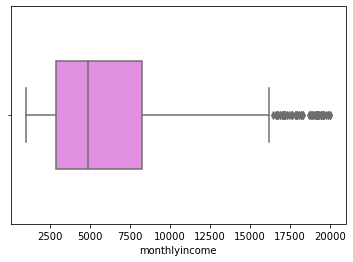

In [208]:
# monthlyincome

# añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(x = "monthlyincome", 
            data = df_limpio_completo_total, 
            width = 0.5, 
            color = "violet")
;

- Encontramos una cantidad de outliers elevada, por lo que descartamos la MEDIA y probamos la MEDIANA:

In [209]:
imputacion_mediana = df_limpio_completo_total["monthlyincome"].fillna(mediana)
imputacion_mediana

0       19537.0
1       19999.0
2       19232.0
3       17169.0
4        4859.0
         ...   
1609    10325.0
1610     4447.0
1611     4859.0
1612     4859.0
1613    10845.0
Name: monthlyincome, Length: 1614, dtype: float64

In [210]:
# Hacemos copias de seguridad.

df_limpio_completo_total_copia = df_limpio_completo_total.copy()
df_copia = df_limpio_casi_completo.copy()

In [211]:
# MÉTODOS COMPLEJOS: IterativeImputer

# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos. OJO con el doble corchete de la columna.
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["monthlyincome"]])

# comprobamos que lo que nos devuelve es un array 
imputer_iterative_imputado

array([[19537.        ],
       [19999.        ],
       [19232.        ],
       ...,
       [ 6477.68612192],
       [ 6477.68612192],
       [10845.        ]])

In [212]:
# MÉTODOS COMPLEJOS: KNN

# NOTA, la ejecución de esta celda puede tardar un ratito

# instanciamos la clase del KNNImputer

imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos

imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["monthlyincome"]])

# comprobamos que es lo que nos devuelve es un array

imputer_knn_imputado

array([[19537.        ],
       [19999.        ],
       [19232.        ],
       ...,
       [ 6477.68612192],
       [ 6477.68612192],
       [10845.        ]])

In [213]:
# Ahora añadimos a nuestro dataframe copia ((df_copia) las tres columnas con valores imputados para monthlyincome.

df_copia['imputando_con_mediana'] = imputacion_mediana
df_copia['imputando_II'] = imputer_iterative_imputado
df_copia['imputando_con_KNN'] = imputer_knn_imputado

df_copia.sample()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework,imputando_con_mediana,imputando_II,imputando_con_KNN
1430,34.0,No,NaN,181.0,NaN,2,4,NaN,1755.0,4,M,97.0,4,1,research scientist,4,married,5586,0,yes,14,3.0,1,"80,0",NaN,NaN,3,6.0,3,3.0,5,1,2,1989,Unknown,No,4859.0,6477.686122,6477.686122


In [214]:
# Para comparar los diferentes resultados, usamos el método describe. 
# Vemos las columnas con valores imputadas y las comparamos con la columna original 'yearincome'
# Nos quedamos con el resultado que menos se aleje de los estadísticos originales.

df_copia.describe()[['monthlyincome', 'imputando_con_mediana', 'imputando_II', 'imputando_con_KNN']]

,monthlyincome,imputando_con_mediana,imputando_II,imputando_con_KNN
count,771.000000,1614.000000,1614.000000,1614.000000
mean,6477.686122,5632.238538,6477.686122,6477.686122
std,4766.119959,3390.878605,3293.010745,3293.010745
min,1009.000000,1009.000000,1009.000000,1009.000000
25%,2880.000000,4859.000000,5058.000000,5058.000000
50%,4859.000000,4859.000000,6477.686122,6477.686122
75%,8230.500000,4859.000000,6477.686122,6477.686122
max,19999.000000,19999.000000,19999.000000,19999.000000


In [215]:
# Aunque las 3 columnas dan resultados muy parecidos, RESULTADO: II y KNN son exactamente iguales entre sí. Nos sirve cualquiera de ellos.

# Sustituimos en nuestro dataframe la columna 'yearincome' por los resultados de II. 


df_limpio_completo_total['monthlyincome'] = df_copia['imputando_II']

In [216]:
# Comprobamos que ya no quedan nulos.

df_limpio_completo_total['monthlyincome'].isnull().sum()

0

In [217]:
df_limpio_completo_total.sample(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
1411,26.0,No,rarely,474.0,unknown,3,3,unknown,1581.0,1,F,89.0,3,1,research scientist,4,unknown,11133,1,unknown,21,4.0,1,40.0,77732.233463,6477.686122,0,1.000000,5,3.0,1,0,0,1997,unknown,Si
226,40.0,No,rarely,523.0,unknown,2,3,Life Sciences,1346.0,3,M,98.0,3,2,research scientist,4,single,22455,1,unknown,13,3.0,3,40.0,77732.233463,6477.686122,0,9.000000,4,3.0,9,8,8,1983,unknown,Si
1548,43.0,No,frequently,NaN,unknown,10,4,Life Sciences,430.0,3,F,33.0,3,1,laboratory technician,4,unknown,10675,0,no,19,3.0,1,40.0,29460.000000,2455.000000,0,11.318934,5,3.0,8,1,7,1980,unknown,No


## IMPUTACION COMPLEJA COLUMNA 'HOURLYRATE' MARIA

In [218]:
df_limpio_completo_total_con_hr = df_limpio_completo_total.copy()

In [219]:
# Calculamos la media y la mediana. 

media = df_limpio_completo_total_con_hr["hourlyrate"].mean()

mediana = df_limpio_completo_total_con_hr["hourlyrate"].median()

print(f"La media es {media}. La mediana es {mediana}")

La media es 66.0281045751634. La mediana es 66.0


Para decidir si nos quedamos con la media o la mediana, vamos a estudiar los outliers gráficamente.

''

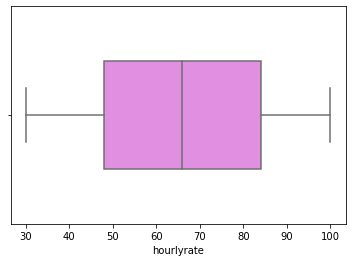

In [220]:
# monthlyincome

# añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(x = "hourlyrate", 
            data = df_limpio_completo_total_con_hr, 
            width = 0.5, 
            color = "violet")
;

No encontramos outliers, por lo que imputamos con la MEDIA:

In [221]:
imputacion_media = df_limpio_completo_total_con_hr["hourlyrate"].fillna(media)
imputacion_media

0       51.0
1       65.0
2       58.0
3       82.0
4       45.0
        ... 
1609    51.0
1610    57.0
1611    41.0
1612    84.0
1613    75.0
Name: hourlyrate, Length: 1614, dtype: float64

In [222]:
df_limpio_completo_total_con_hr_copia = df_limpio_completo_total_con_hr.copy()
df_copia = df_limpio_casi_completo.copy()

In [223]:
# MÉTODOS COMPLEJOS: IterativeImputer

# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos. OJO con el doble corchete de la columna.
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["hourlyrate"]])

# comprobamos que lo que nos devuelve es un array 
imputer_iterative_imputado

array([[51.],
       [65.],
       [58.],
       ...,
       [41.],
       [84.],
       [75.]])

In [224]:
# MÉTODOS COMPLEJOS: KNN

# NOTA, la ejecución de esta celda puede tardar un ratito

# instanciamos la clase del KNNImputer

imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos

imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["hourlyrate"]])

# comprobamos que es lo que nos devuelve es un array

imputer_knn_imputado

array([[51.],
       [65.],
       [58.],
       ...,
       [41.],
       [84.],
       [75.]])

In [225]:
# Ahora añadimos a nuestro dataframe copia ((df_copia) las tres columnas con valores imputados para monthlyincome.

df_copia['imputando_con_media'] = imputacion_media
df_copia['imputando_II'] = imputer_iterative_imputado
df_copia['imputando_con_KNN'] = imputer_knn_imputado

df_copia.sample()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework,imputando_con_media,imputando_II,imputando_con_KNN
1595,38.0,No,NaN,240.0,NaN,2,4,Life Sciences,803.0,1,F,75.0,4,2,manufacturing director,1,single,26085,6,unknown,12,3.0,4,NaN,71760.0,5980.0,0,17.0,2,3.0,15,4,12,1985,Unknown,No,75.0,75.0,75.0


In [226]:
# Para comparar los diferentes resultados, usamos el método describe. 
# Vemos las columnas con valores imputadas y las comparamos con la columna original 'hourlyrate'
# Nos quedamos con el resultado que menos se aleje de los estadísticos originales.

df_copia.describe()[['hourlyrate', 'imputando_con_media', 'imputando_II', 'imputando_con_KNN']]

,hourlyrate,imputando_con_media,imputando_II,imputando_con_KNN
count,1530.000000,1614.000000,1614.000000,1614.000000
mean,66.028105,66.028105,66.028105,66.028105
std,20.185954,19.653316,19.653316,19.653316
min,30.000000,30.000000,30.000000,30.000000
25%,48.000000,49.000000,49.000000,49.000000
50%,66.000000,66.028105,66.028105,66.028105
75%,84.000000,83.000000,83.000000,83.000000
max,100.000000,100.000000,100.000000,100.000000


In [227]:
# Aunque las 3 columnas dan resultados muy parecidos, RESULTADO: II y KNN son exactamente iguales entre sí. Nos sirve cualquiera de ellos.

# Sustituimos en nuestro dataframe la columna 'yearincome' por los resultados de II. 


df_limpio_completo_total_con_hr['hourlyrate'] = df_copia['imputando_II']

In [228]:
# Comprobamos que ya no quedan nulos.

df_limpio_completo_total_con_hr['hourlyrate'].isnull().sum()

0

In [229]:
df_limpio_completo_total_con_hr.sample(20)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,yearincome,monthlyincome,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,roledepartament,remotework
1035,27.0,No,frequently,793.0,unknown,2,1,Life Sciences,1371.0,4,M,43.0,1,2,sales executive,4,single,20392,3,no,20,4.00,2,40.0,60852.000000,5071.000000,0,11.318934,3,3.0,6,0,0,1996,unknown,No
520,42.0,No,rarely,300.0,unknown,2,3,unknown,2031.0,1,M,56.0,3,5,manager,3,married,17312,5,unknown,11,3.00,1,40.0,77732.233463,6477.686122,0,24.000000,2,2.0,22,4,14,1981,unknown,Si
655,41.0,No,rarely,337.0,unknown,8,3,unknown,1909.0,3,F,54.0,3,2,sales executive,2,unknown,26841,5,no,21,4.00,3,40.0,77732.233463,6477.686122,1,14.000000,3,3.0,5,1,4,1982,unknown,Si
484,39.0,No,rarely,613.0,unknown,6,1,unknown,2062.0,4,M,42.0,2,3,healthcare representative,1,unknown,21457,4,unknown,15,3.00,1,40.0,119892.000000,9991.000000,1,11.318934,5,3.0,7,1,7,1984,unknown,Si
267,36.0,No,rarely,1299.0,Research & Development,27,3,Medical,unknown,3,M,94.0,3,2,healthcare representative,3,unknown,16577,6,unknown,13,3.00,2,40.0,77732.233463,6477.686122,2,17.000000,3,2.0,7,7,7,1987,healthcare representative - research & development,Si
96,33.0,No,rarely,117.0,Research & Development,9,3,Medical,1238.0,1,M,60.0,3,1,research scientist,4,married,6311,0,unknown,13,3.00,2,40.0,77732.233463,6477.686122,1,15.000000,5,3.0,14,4,10,1990,research scientist - research & development,No
1182,33.0,No,rarely,922.0,unknown,1,5,unknown,612.0,1,F,95.0,4,4,research director,3,unknown,22578,4,no,19,3.00,3,40.0,194208.000000,16184.000000,1,10.000000,2,3.0,6,0,5,1990,unknown,No
503,39.0,No,frequently,945.0,unknown,22,3,Medical,unknown,4,F,82.0,3,3,manufacturing director,1,single,5083,1,unknown,13,3.00,3,40.0,77732.233463,6477.686122,0,11.318934,2,3.0,21,2,8,1984,unknown,No
1110,41.0,No,non-travel,552.0,Human Resources,4,3,Human Resources,1722.0,3,M,60.0,1,2,human resources,2,married,20794,6,no,19,3.15,2,40.0,77732.233463,6477.686122,1,11.318934,4,3.0,3,1,2,1982,human resources - human resources,No
744,28.0,No,rarely,736.0,unknown,26,3,Life Sciences,1387.0,3,M,48.0,2,2,sales executive,1,married,24232,1,unknown,11,3.00,3,40.0,77732.233463,6477.686122,1,5.000000,0,3.0,5,0,4,1995,unknown,Si


In [231]:
df_limpio_completo_total_con_hr.to_csv('df_limpio_nulos_gestionados.csv')